In [1]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
df = pd.read_csv('primary_with_cluster_labels.csv')

In [10]:
df.head()

,name,tagline,summary,description,year_founded,website,city,region,country,postal_code,...,mosaic_change,funding_total_millions,last_funding_millions,funding_count,last_funding_type,last_funding_date,sentiment,articles,sentimentScore,cluster
0,Valera Health,"Your Path to Wellness, Just a Click Away","Valera Health, based in New York, is a mental ...",Valera Health operates as a tele-mental health...,2015.0,https://valerahealth.com,Brooklyn,New York,United States,11249,...,-117.0,76.32,9.12,8,Series B - II,2024-04-09,"{'sentimentScore': 100, 'cntPositive': 15, 'cn...",[{'contentId': 'ab325015a7bbae7beefc4833b73696...,100,1
1,Bestow,"Protecting Life, Simplified",Bestow is a Texas-based company that offers fa...,Bestow operates as an insurance technology com...,2017.0,https://bestow.com,Dallas,Texas,United States,75226,...,-119.0,138.10,70.00,5,Series C,2020-12-16,"{'sentimentScore': 90, 'cntPositive': 48, 'cnt...",[{'contentId': 'b633176d-6378-46d0-9b15-d2b611...,90,2
2,PlainID,"Secure Your Identity, Empower Your Business",PlainID is a company based in Tel Aviv that sp...,PlainID is an Identity Security Posture Manage...,2014.0,https://plainid.com,Tel Aviv,NaN,Israel,6789139,...,-120.0,99.00,75.00,5,Series C,2021-12-21,"{'sentimentScore': 100, 'cntPositive': 21, 'cn...",[{'contentId': '29c3c127-069d-4be7-aaf6-3a89bb...,100,1
3,Snapcart,"Innovating Connections, Empowering Insights",Snapcart is a commercial company based in Jaka...,Snapcart specializes in real-time offline shop...,2015.0,https://snapcart.global,Jakarta,NaN,Indonesia,12940,...,124.0,14.70,10.00,4,Series A,2017-10-25,"{'sentimentScore': 92, 'cntPositive': 7, 'cntN...",[{'contentId': '5ffd28ae-d4f3-46e2-a3b1-526c96...,92,2
4,slice,"Experience Money, Mastered.",slice is a financial technology company based ...,Slice operates as a financial technology compa...,2016.0,https://sliceit.com,NaN,Assam,India,781028,...,-76.0,390.50,7.77,21,Debt - VIII,2024-07-19,"{'sentimentScore': 89, 'cntPositive': 36, 'cnt...",[{'contentId': 'ce75fa10-6d0f-45d5-bf66-2532b8...,89,1


In [4]:
numerical_cols = [
    'year_founded',
    'investor_count',
    'mosaic_change',
    'funding_total_millions',
    'last_funding_millions',
    'funding_count',
    'sentimentScore',
    'cluster'
]

In [11]:
#select 'cluster' as the target for prediction
X = df[numerical_cols[:-1]]  # All columns except 'cluster'
y = df['cluster']

#create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#feature scaling is best practice for neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled

array([[ 0.73610856,  0.52188196, -0.29576101, ..., -0.30244367,
        -0.1984724 ,  0.71804358],
       [ 1.04515909, -1.19744994, -1.06993434, ..., -0.37226874,
        -0.81896277,  0.71804358],
       [-2.04534624, -0.48106165, -1.00219418, ..., -0.30244367,
         0.42201797, -2.43996214],
       ...,
       [ 0.11800749,  0.66515962,  0.01390832, ...,  2.19729374,
         0.11177278,  0.43095215],
       [ 0.73610856,  0.3786043 , -0.16028068, ..., -0.24825942,
        -0.1984724 ,  0.71804358],
       [-0.19104304,  1.52482557, -0.16028068, ...,  1.37307864,
         1.35275352,  0.52664929]])

In [8]:
#neural network model using keras. Note the very basic model with only three layers and fairly standard
#activations for each
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')  #since there are 3 classes
])

#compiling the model with a typical optimizer and loss function
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#training the model on the data
history = model.fit(
    X_train_scaled, y_train,
    epochs=9,
    batch_size=32,
    validation_split=0.1,           #Note a validation set is used
    verbose=1
)

#model evaluation for each epoch
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/9
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6785 - loss: 0.7923 - val_accuracy: 0.9524 - val_loss: 0.1884
Epoch 2/9
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9791 - loss: 0.1314 - val_accuracy: 0.9615 - val_loss: 0.1111
Epoch 3/9
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9824 - loss: 0.0793 - val_accuracy: 0.9728 - val_loss: 0.0761
Epoch 4/9
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9866 - loss: 0.0625 - val_accuracy: 0.9887 - val_loss: 0.0515
Epoch 5/9
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9881 - loss: 0.0497 - val_accuracy: 0.9909 - val_loss: 0.0479
Epoch 6/9
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9911 - loss: 0.0406 - val_accuracy: 0.9819 - val_loss: 0.0462
Epoch 7/9
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9904 - loss: 0.0425 - val_accuracy: 0.9887 - val_loss: 0.0385
Epoch 8/9
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9925 - loss: 0.0290 - val_accuracy: 0.9909 - 

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


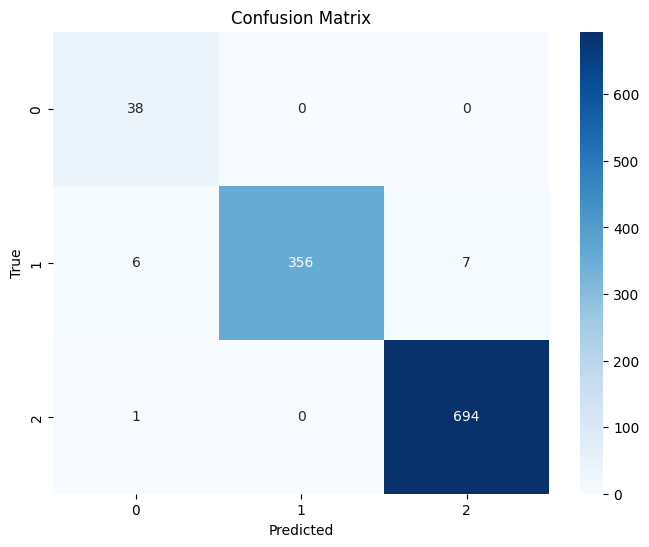

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#predictions on test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=1)

#confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

#plotting with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(3), yticklabels=range(3))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()